<a href="https://colab.research.google.com/github/Deepthi-01997264/cs480student/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In this assignment, we will train a U-Net classifer to detect mitochondria
# in electron microscopy images!

In [ ]:
### IMPORTANT ###
#
# Activate GPU support: Runtime -> Change Runtime Type
# Hardware Accelerator: GPU
#
### IMPORTANT ###

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load the unet tensorflow code
!pip install git+https://github.com/jakeret/unet.git

  Cloning https://github.com/jakeret/unet.git to /tmp/pip-req-build-5eagq293
  Running command git clone -q https://github.com/jakeret/unet.git /tmp/pip-req-build-5eagq293
  Created wheel for unet: filename=unet-0.0.post0.dev81+gf557a51-py2.py3-none-any.whl size=25688 sha256=21117c0b665b252e8bbf6b1116cd981f6a6c55833ba8a8312cf57701d32bb683
  Stored in directory: /tmp/pip-ephem-wheel-cache-p_jt1k4a/wheels/22/00/93/ce57529ed355f160088cbb6ce086e55168770913b40cf624ba
Successfully built unet


In [3]:
# .. and use it!
# Note: There are a ton of U-Net implementations but this one is easier to use!
import unet

**Task 1**: Study the unet circle example and learn about mitochondria! [15 Points]

In [ ]:
# The unet package allows to train a U-Net classifier with little code.
# As discussed in class, the U-Net can be used to label/segment/annotate images.

In [ ]:
# TODO: Please study the Circles example 
# https://github.com/jakeret/unet/blob/master/notebooks/circles.ipynb

In [ ]:
# TODO: ... and look how the (artificial) dataset is generated
# https://github.com/jakeret/unet/blob/master/src/unet/datasets/circles.py

In [4]:
# 1) Question
# TODO: Please describe what the U-Net is trained to do.
#
# TODO: YOUR ANSWER
'''U-Net is a convolutional neural network created by Olaf Ronneberger, Philipp Fischer and Thomas Brox in 2015.
Initially developed for biomedical image segmentation U-Net has morphed into a standard for general image segmentation.'''

'U-Net is a convolutional neural network created by Olaf Ronneberger, Philipp Fischer and Thomas Brox in 2015.\nInitially developed for biomedical image segmentation U-Net has morphed into a standard for general image segmentation.'

In [5]:
# 2) Question
# TODO: In circles.py, what does the following mean:
#     channels = 1
#     classes = 2
#
# TODO: YOUR ANSWER
'''Channels represent number of channels of the input tensors.
Classes represent the number of regions to segment.'''

'Channels represent number of channels of the input tensors.\nClasses represent the number of regions to segment.'

In [6]:
# 3) Question
# TODO: What are mitochondria and what is their appearance in
# electron microscopy data?
# Hint: You can validate your answer in Task 4!
#
# TODO: YOUR ANSWER
'''Mitochondria is an organelle found in large numbers in most cells, in which the biochemical processes of respiration and energy production occur.
Mitochondria have a distinctive appearance when viewed by electron microscopy. They often appear as rounded or sausage-shaped structures.'''

'Mitochondria is an organelle found in large numbers in most cells, in which the biochemical processes of respiration and energy production occur.\nMitochondria have a distinctive appearance when viewed by electron microscopy. They often appear as rounded or sausage-shaped structures.'

**Task 2**: Setup a datagenerator for mitochondria images! [45 Points]

In [7]:
# TODO: 
# Download https://cs480.org/data/mito.npz to your computer.
# Then, please upload mito.npz using the file panel on the left.
!wget https://cs480.org/data/mito.npz

--2022-04-25 23:32:38--  https://cs480.org/data/mito.npz
Resolving cs480.org (cs480.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to cs480.org (cs480.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37610178 (36M) [application/octet-stream]
Saving to: ‘mito.npz’

mito.npz            100%[===================>]  35.87M  --.-KB/s    in 0.1s    

2022-04-25 23:32:38 (258 MB/s) - ‘mito.npz’ saved [37610178/37610178]



In [ ]:
# The code below is similar to the circles.py file from Task 1.
# We follow Tensorflow conventions to design a tf.data.Dataset for training
# the U-Net.
#
# TODO: Please add four different data augmentation methods in the code block
# below. (image normalization to 0..1, horizontal data flip, vertical data flip,
# rotation by 90 degrees)
#
# Hint: https://github.com/jakeret/unet/blob/master/src/unet/datasets/oxford_iiit_pet.py#L25

In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow_datasets.core import DatasetInfo
from typing import Tuple, List

IMAGE_SIZE = (256, 256)
channels = 1
classes = 2

def load_data(count:int, splits:Tuple[float]=(0.7, 0.2, 0.1), **kwargs) -> List[tf.data.Dataset]:
    return [tf.data.Dataset.from_tensor_slices(_build_samples(int(split * count), **kwargs))
            for split in splits]


def _build_samples(sample_count:int, **kwargs) -> Tuple[np.array, np.array]:

    # here we load the mitochondria data
    loaded = np.load('mito.npz')
    loadedimages = loaded['arr_0'][0].copy()
    loadedmasks = loaded['arr_0'][1].copy()

    # now let's go to numpyland
    images = np.empty((sample_count, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
    labels = np.empty((sample_count, IMAGE_SIZE[0], IMAGE_SIZE[1], 2))
    for i in range(sample_count):
        image, mask = loadedimages[i], loadedmasks[i]

        image = image.reshape((IMAGE_SIZE[0], IMAGE_SIZE[1], 1)).astype(np.float)
        mask = mask.reshape((IMAGE_SIZE[0], IMAGE_SIZE[1], 1))

        #
        # TODO: Normalize the image to 0..1
        #
        # TODO: YOUR CODE
        image = tf.cast(image, tf.float32) / 255.0
        #
        # TODO: Use Tensorflow to flip the image horizontally
        #
        if tf.random.uniform(()) > 0.5:
            #
            # TODO: YOUR CODE
            #
            image = tf.image.flip_left_right(image)

        #
        # TODO: Use Tensorflow to flip the image vertically
        #
        if tf.random.uniform(()) > 0.5:
            #
            # TODO: YOUR CODE
            #
            image = tf.image.flip_up_down(image)

        #
        # TODO: Use Tensorflow to rotate the image 90 degrees
        #
        if tf.random.uniform(()) > 0.5:
            #
            # TODO: YOUR CODE
            #
            image = tf.image.rot90(image)


        # augmentation done, let's store the image
        images[i] = image

        # here we split the mask to background and foreground
        fg = np.zeros((IMAGE_SIZE[0], IMAGE_SIZE[1], 1), dtype=np.bool)
        fg[mask == 255] = 1
        bg = np.zeros((IMAGE_SIZE[0], IMAGE_SIZE[1], 1), dtype=np.bool)
        bg[mask == 0] = 1
        
        labels[i, :, :, 0] = bg[:,:,0]
        labels[i, :, :, 1] = fg[:,:,0]

    return images, labels

**Task 3**: Let's train the U-Net! [25 Points]

In [9]:
#
# We can now create our training, validation, and testing data by calling
# our methods from Task 2.
#
train, val, test = load_data( 660, splits=(0.7, 0.2, 0.1) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: `np.bool` is a deprecated alias for the bu

In [10]:
# 1) Question
# TODO: We have in total 660 images + 660 masks. Based on the code above,
# how many images are used for training alone?
#
# TODO: YOUR ANSWER
print("Number of training images : " , len(train))

Number of training images :  461


In [11]:
#
# Let's setup the U-Net!
#
LEARNING_RATE = 1e-3

unet_model = unet.build_model(channels=channels,
                              num_classes=classes,
                              layer_depth=5,
                              filters_root=64,
                              padding="same")

unet.finalize_model(unet_model, learning_rate=LEARNING_RATE)

In [12]:
#
# And, let's setup the trainer...
#
trainer = unet.Trainer(checkpoint_callback=False,
                       learning_rate_scheduler=unet.SchedulerType.WARMUP_LINEAR_DECAY,
                       warmup_proportion=0.1,
                       learning_rate=LEARNING_RATE)

In [13]:
#
# ...and train the U-Net for 50 epochs with a batch_size of 10!
#
# TODO: Please complete the code below.
# Hint: Don't forget to use training and validation data.
# Hint 2: This will take roughly 30 minutes!
#
trainer.fit(unet_model,
            #
            # TODO: YOUR CODE
            #
            #
            train,
            val,
            epochs=50,
            batch_size=10
            )

Epoch 1/50
47/47 [==============================] - 49s 803ms/step - loss: 0.5500 - categorical_crossentropy: 0.5500 - categorical_accuracy: 0.8580 - mean_iou: 0.3409 - dice_coefficient: 0.6268 - auc: 0.8416 - learning_rate: 9.9911e-05 - val_loss: 0.3775 - val_categorical_crossentropy: 0.3775 - val_categorical_accuracy: 0.9434 - val_mean_iou: 0.3719 - val_dice_coefficient: 0.6984 - val_auc: 0.9465
Epoch 2/50
47/47 [==============================] - 34s 728ms/step - loss: 0.3682 - categorical_crossentropy: 0.3682 - categorical_accuracy: 0.9115 - mean_iou: 0.4189 - dice_coefficient: 0.7912 - auc: 0.9124 - learning_rate: 2.9991e-04 - val_loss: 0.3169 - val_categorical_crossentropy: 0.3169 - val_categorical_accuracy: 0.9434 - val_mean_iou: 0.3980 - val_dice_coefficient: 0.7509 - val_auc: 0.9473
Epoch 3/50
47/47 [==============================] - 34s 735ms/step - loss: 0.3495 - categorical_crossentropy: 0.3495 - categorical_accuracy: 0.9115 - mean_iou: 0.4269 - dice_coefficient: 0.8088 - au

**Task 4**: Let's predict mitochondria in the testing data! [15 Points]

In [ ]:
# 
# After training, let's try the U-Net on our testing data.
#
# The code below displays the first 10 input images, the original masks by experts, 
# and the predicted masks from the U-Net.

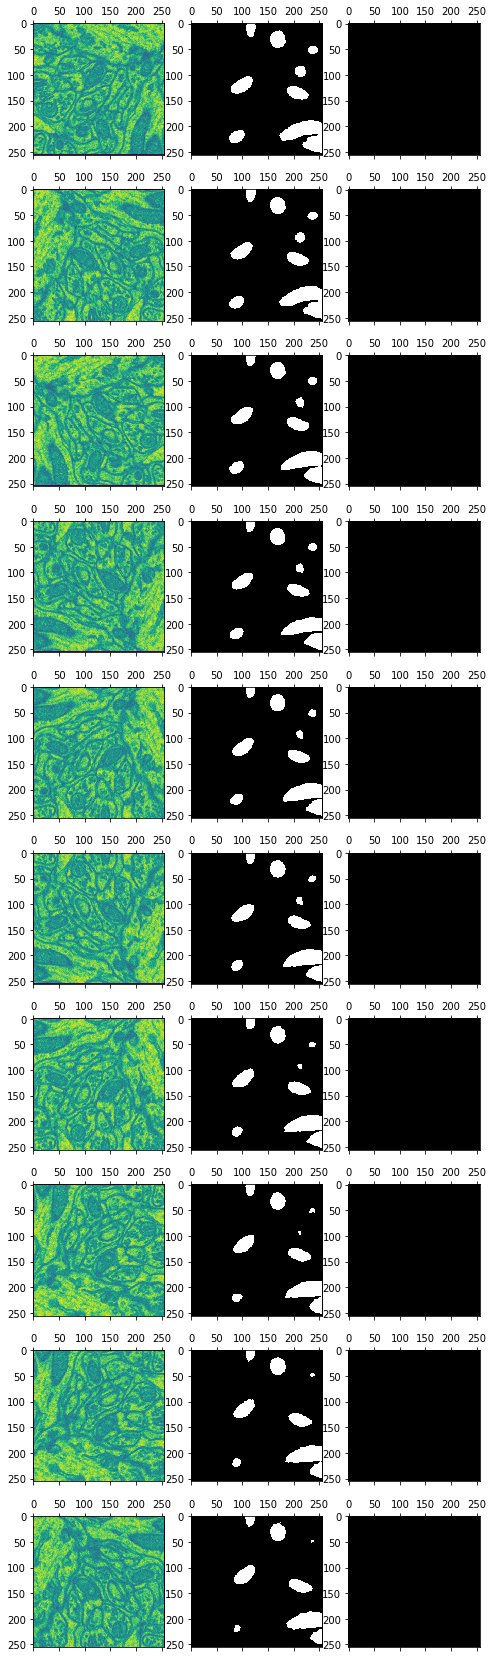

In [14]:
rows = 10
fig, axs = plt.subplots(rows, 3, figsize=(8, 30))
for ax, (image, label) in zip(axs, test.take(rows).batch(1)):
  
  prediction = unet_model.predict(image)
  ax[0].matshow(image[0, :, :, 0])
  ax[1].matshow(label[0, :, :, 1], cmap="gray")
  ax[2].matshow(prediction[0].argmax(axis=-1), cmap="gray")

In [16]:
# 1) Question
# TODO: Why do we use the prediction[0].argmax(axis=-1) command
# to display the prediction?
# 
# TODO: YOUR ANSWER
'''Prediction output has the shape of (1,256,256,2). This line will extract the 256,256 whose values are max in the last/4th axis (as axis = -1).'''

'Prediction output has the shape of (1,256,256,2). This line will extract the 256,256 whose values are max in the last/4th axis (as axis = -1).'

In [17]:
# 2) Question
# TODO: Is the quality of the segmentation good and how could we improve it?
# Hint: Think along the lines of some traditional image processing rather than
# increasing the training data size.
#
# TODO: YOUR ANSWER
'''Segmentation result is not good. Other than improving training data size we can 
apply denoising filters during the data loading step.'''

'Segmentation result is not good. Other than improving training data size we can \napply denoising filters during the data loading step.'

**Bonus**: Compare against the state-of-the-art literature! [33 Points]

In [ ]:
#
# The following paper also uses a 2D U-Net to detect mitochondria:
# 
# https://danielhaehn.com/papers/?casser2020fast
#

In [ ]:
# 1) Question
#
# TODO: How many learnable parameters does your trained unet_model have?
# Hint: You can use TF's Model Summary function to answer this.
#


In [18]:
# TODO: YOUR CODE
trainableParams = np.sum([np.prod(v.get_shape()) for v in unet_model.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in unet_model.non_trainable_weights])
#totalParams = trainableParams + nonTrainableParams
 
print("Trainable Parameters : ", trainableParams)
#print("Non Trainable Parameters : ", nonTrainableParams)
#print("Total Parameters = ", totalParams)

Trainable Parameters :  31030658


In [ ]:
# 2) Question
#
# TODO: How many parameters do Casser et al. use?
#

In [20]:
# TODO: YOUR ANSWER
'''1,958,533'''

'1,958,533'

In [ ]:
# 3) Question
#
# TODO: How did Casser et al. reduce the parameters?
#

In [21]:
# TODO: YOUR ANSWER
'''Casser et al attained this by reducing the number of convolutional filters throughout the network. As well as by replacing
transpose convolutions in the decoder with light-weight bilinear upsampling layers that
require no parameters.
Also relpaced center-cropping from the original U-Net with padding to output
densely at full resolution.'''

'Casser et al attained this by reducing the number of convolutional filters throughout the network. As well as by replacing\ntranspose convolutions in the decoder with light-weight bilinear upsampling layers that\nrequire no parameters.\nAlso relpaced center-cropping from the original U-Net with padding to output\ndensely at full resolution.'

In [ ]:
# 4) Question
#
# TODO: Why did Casser et al. reduce the parameters?
#

In [22]:
# TODO: YOUR ANSWER
'''The paper mentions that above modifications have increased the throughput by 40%. Also as per their inspection
original U-Net's 33.53% filters were inactive while Casser et al's model utitlize 99.7% of its filters.'''

"The paper mentions that above modifications have increased the throughput by 40%. Also as per their inspection\noriginal U-Net's 33.53% filters were inactive while Casser et al's model utitlize 99.7% of its filters."

In [ ]:
#
# You made it!!
#
#                 _ ___                /^^\ /^\  /^^\_
#     _          _@)@) \            ,,/ '` ~ `'~~ ', `\.
#   _/o\_ _ _ _/~`.`...'~\        ./~~..,'`','',.,' '  ~:
#  / `,'.~,~.~  .   , . , ~|,   ,/ .,' , ,. .. ,,.   `,  ~\_
# ( ' _' _ '_` _  '  .    , `\_/ .' ..' '  `  `   `..  `,   \_
#  ~V~ V~ V~ V~ ~\ `   ' .  '    , ' .,.,''`.,.''`.,.``. ',   \_
#   _/\ /\ /\ /\_/, . ' ,   `_/~\_ .' .,. ,, , _/~\_ `. `. '.,  \_
#  < ~ ~ '~`'~'`, .,  .   `_: ::: \_ '      `_/ ::: \_ `.,' . ',  \_
#   \ ' `_  '`_    _    ',/ _::_::_ \ _    _/ _::_::_ \   `.,'.,`., \-,-,-,_,_,
#    `'~~ `'~~ `'~~ `'~~  \(_)(_)(_)/  `~~' \(_)(_)(_)/ ~'`\_.._,._,'_;_;_;_;_;
#


# Worked together with Anudeep Reddy Veerla